# Runnin PCA, ICA, and then, K-means on ISH data

In [7]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
%run nifti_tools.ipynb

In [3]:
# Loading the PCs array
PC_arr = np.load('/data/bioprotean/ABA/PCA/PC_n271.npy')

In [4]:
# Running ICA
ica = FastICA(n_components = 271)
S_ = ica.fit_transform(PC_arr)
A_ = ica.mixing_

In [5]:
# Kmeans on NMF
n_clusters = 100
kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 50, random_state = 0)
kmeans.fit_predict(S_)
kmeans_labels = kmeans.labels_

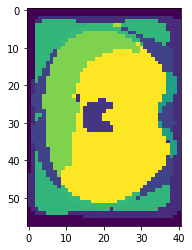

In [9]:
# Visualizing a slice
slice_n = 25
component = kmeans_labels.reshape(67,58,41)
slice = component[slice_n,:,:]
plt.imshow(slice)

# Not good!